# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Market.csv')

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [4]:
#satisfaction : self reported
#brand loyalty : purchases for 1year +other factors


Text(0, 0.5, 'Loyalty')

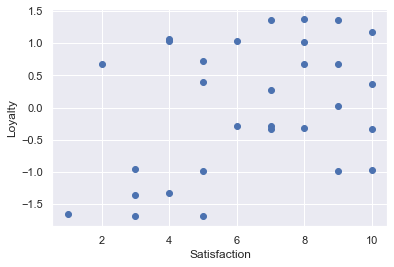

In [5]:
#ploting the data
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

It can be divided into four quarters
1. Low satisfaction high loyalty
2. High satisfaction high loylaty
3. Low satisfaction low loyalty
4. High Satisfaction low loyalty
5. 1|2
6. 3|4

In [6]:
#Select the features
x = data.copy()

In [7]:
#clustering

kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [9]:
#Clustering results
clusters = x.copy()
clusters['cluster_pred']= kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

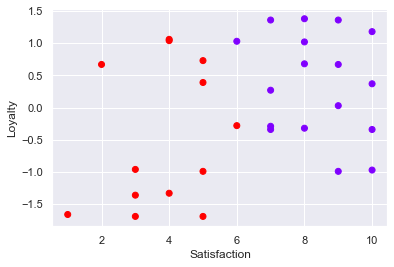

In [11]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

#we need to standardize the variables as the algorithm is not considering loyalty as a feature


In [12]:
#Standardize the variable
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [14]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.43875645372026,
 4.380320178840312,
 3.97952860914899]

Text(0, 0.5, 'WCSS')

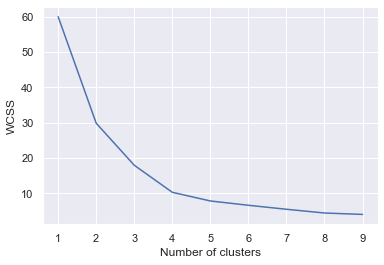

In [15]:
plt.plot(range(1,10),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [22]:
#Exploring clustering solutions and select the number of clusters
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [23]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

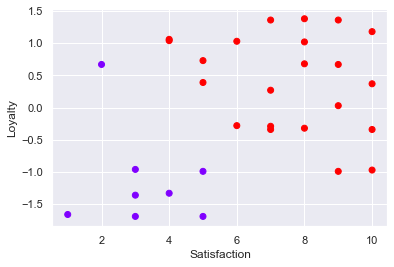

In [24]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

#from wcss we can assum 3,4,5 as number of clusters for best results
#lets try them all

In [28]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)
clusters_3 = x.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)

In [29]:
clusters_3

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

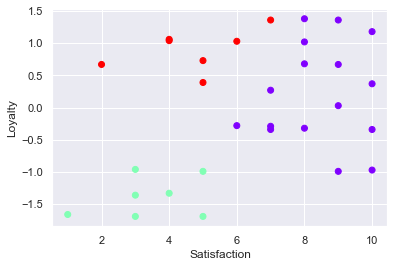

In [30]:
plt.scatter(clusters_3['Satisfaction'],clusters_3['Loyalty'],c=clusters_3['cluster_pred'],cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Text(0, 0.5, 'Loyalty')

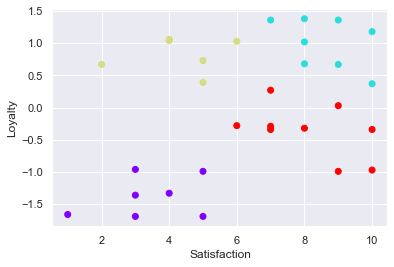

In [31]:
kmeans_4 = KMeans(4)
kmeans_4.fit(x_scaled)
clusters_4 = x.copy()
clusters_4['cluster_pred'] = kmeans_4.fit_predict(x_scaled)
clusters_4
plt.scatter(clusters_4['Satisfaction'],clusters_4['Loyalty'],c=clusters_4['cluster_pred'],cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Text(0, 0.5, 'Loyalty')

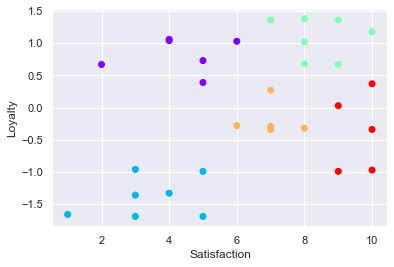

In [32]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)
clusters_5 = x.copy()
clusters_5['cluster_pred'] = kmeans_5.fit_predict(x_scaled)
clusters_5
plt.scatter(clusters_5['Satisfaction'],clusters_5['Loyalty'],c=clusters_5['cluster_pred'],cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')